In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import os
import oommfpy as op
import oommfpy.tools as ot

In [2]:
omfs = glob.glob('sims/oommf/sk_lattice_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/sk_lattice_FeGe/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=m_Bz)\d\d\d', f).group(0)))

In [3]:
omfs

['sims/oommf/sk_lattice_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/sk_lattice_FeGe/m_Bz000mT-Oxs_MinDriver-Magnetization-00-0002997.omf',
 'sims/oommf/sk_lattice_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/sk_lattice_FeGe/m_Bz100mT-Oxs_MinDriver-Magnetization-00-0004147.omf',
 'sims/oommf/sk_lattice_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/sk_lattice_FeGe/m_Bz150mT-Oxs_MinDriver-Magnetization-00-0003705.omf']

In [5]:
z_maps = []
hsl_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    fltr = data.z == data.zs[len(data.zs) // 2]
    
    z_map = data.field_z[fltr].reshape(len(data.xs), -1)
    
    hsl_map = data.field[fltr]
    hsl_map = ot.generate_colours(hsl_map)
    hsl_map = hsl_map.reshape(len(data.xs), -1, 3)
    
    z_maps.append(np.copy(z_map))
    hsl_maps.append(np.copy(hsl_map)) 

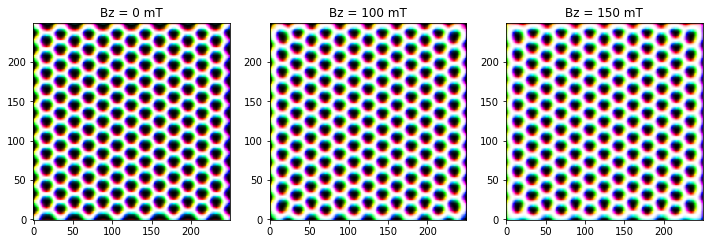

In [7]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 16))

for idx, i in enumerate([0, 100, 150]):
    ax = axs.flatten()[idx]
    ax.imshow(hsl_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

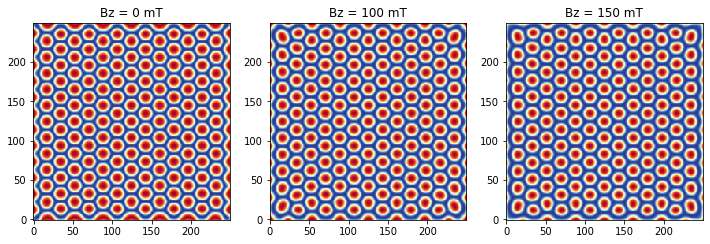

In [8]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 16))

for idx, i in enumerate([0, 100, 150]):
    ax = axs.flatten()[idx]
    ax.imshow(z_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

In [4]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.xs), len(data.ys)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.xs), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

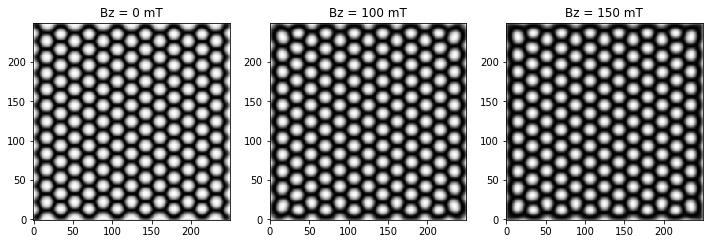

In [5]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))

for idx, i in enumerate([0, 100, 150]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('Bz = {} mT'.format(i))

In [10]:
if not os.path.exists('data_mz_sk_lattice'):
    os.makedirs('data_mz_sk_lattice')

bzs = [0, 100, 150]
for idx, i in enumerate(bzs):
   
    np.savetxt('data_mz_sk_lattice/m_Bz_{:03d}_mT.txt'.format(i), bw_maps[idx])